In [45]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Data sampling
# full_df = pd.read_csv('fulldata.csv')
# full_df['Year'] = full_df['issue_d'].str.split('-').str[1]
# data = full_df.loc[full_df['Year'].isin(['2007', '2008','2009','2010','2011'])]
# data.to_csv('loan07-11.csv')

In [47]:
#Importing the data into a Pandas dataframe
df = pd.read_csv('loan07-11.csv',sep=',', dtype='unicode')
#df = pd.read_csv('accepted_2007_to_2018Q4.csv',sep=',', dtype='unicode')

In [48]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year
0,2099485,NaN,NaN,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
1,2099486,NaN,NaN,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
2,2099487,NaN,NaN,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
3,2099488,NaN,NaN,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
4,2099489,NaN,NaN,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,2142015,NaN,NaN,3500,3500,225.0,36 months,10.28,113.39,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2007
42531,2142016,NaN,NaN,1000,1000,0.0,36 months,9.64,32.11,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2007
42532,2142017,NaN,NaN,2525,2525,225.0,36 months,9.33,80.69,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2007
42533,2142018,NaN,NaN,6500,6500,0.0,36 months,8.38,204.84,A,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2007


In [49]:
#Checking for null values per column
df.isnull().sum()

Unnamed: 0                   0
id                       42535
member_id                42535
loan_amnt                    0
funded_amnt                  0
                         ...  
settlement_date          42375
settlement_amount        42375
settlement_percentage    42375
settlement_term          42375
Year                         0
Length: 147, dtype: int64

In [50]:
#Dropping columns having all NA values
blankColumns = df.columns[(df.isnull().sum() == df.shape[0])]
df = df.drop(blankColumns, axis=1)
df.shape

(42535, 65)

In [51]:
#Generating the % of Null values in each column
(df.isnull().sum()/len(df.index))*100

Unnamed: 0                0.000000
loan_amnt                 0.000000
funded_amnt               0.000000
funded_amnt_inv           0.000000
term                      0.000000
                           ...    
settlement_date          99.623839
settlement_amount        99.623839
settlement_percentage    99.623839
settlement_term          99.623839
Year                      0.000000
Length: 65, dtype: float64

In [52]:
#Dropping columns with more than 60% NA values
sixty = df.columns[100*(df.isnull().sum()/len(df.index)) > 60]
df = df.drop(sixty, axis=1)
df.shape

(42535, 56)

In [53]:
(df.isnull().sum()/len(df.index))*100

Unnamed: 0                     0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.173739
emp_length                     2.614318
home_ownership                 0.000000
annual_inc                     0.009404
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
desc                          31.251910
purpose                        0.000000
title                          0.030563
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.068179
earliest_cr_line               0.068179


In [54]:
#Keeping only the required columns after analysis
keep = ['funded_amnt','term','int_rate','installment','grade','sub_grade',
        'emp_length','home_ownership','annual_inc','verification_status',
        'issue_d','loan_status','purpose','zip_code','addr_state','dti',
        'delinq_2yrs','open_acc','total_acc']
df = df[keep]

In [55]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
42530     < 1 year
42531     < 1 year
42532     < 1 year
42533     < 1 year
42534    10+ years
Name: emp_length, Length: 42535, dtype: object

In [56]:
#Data cleaning
#Dropping rows with Null values in Employee length
df = df[~df['emp_length'].isnull()]
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [57]:
#Keeping only Fully Paid and Charged Off loans
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df['loan_status'].value_counts()

Fully Paid     33268
Charged Off     5440
Name: loan_status, dtype: int64

In [58]:
#Cleaning the term column for modelling part
df['term'] = df['term'].apply(lambda x: re.findall('\d+', str(x))[0])
df['term'] = df['term'].apply(lambda x: pd.to_numeric(x))

In [59]:
df['issue_d']

0        Dec-2011
1        Dec-2011
2        Dec-2011
3        Dec-2011
4        Dec-2011
           ...   
39781    Jul-2007
39782    Jul-2007
39783    Jul-2007
39784    Jul-2007
39785    Jun-2007
Name: issue_d, Length: 38708, dtype: object

In [60]:
df['issue_d'] = df['issue_d'].str.split('-').str[1]

In [61]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4         Fully Paid
            ...     
39781     Fully Paid
39782     Fully Paid
39783     Fully Paid
39784     Fully Paid
39785     Fully Paid
Name: loan_status, Length: 38708, dtype: object

In [62]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_encoded'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_encoded'] = df['loan_encoded'].apply(lambda x: pd.to_numeric(x))

In [63]:
df['loan_encoded']

0        0
1        1
2        0
3        0
4        0
        ..
39781    0
39782    0
39783    0
39784    0
39785    0
Name: loan_encoded, Length: 38708, dtype: int64

In [64]:
# converting loan_status to integer type
df['loan_encoded'].value_counts()

0    33268
1     5440
Name: loan_encoded, dtype: int64

In [65]:
#Changing column type
df['funded_amnt'] = df['funded_amnt'].astype(float)
df['int_rate'] = df['int_rate'].astype(float)
df['installment'] = df['installment'].astype(float)
df['annual_inc'] = df['annual_inc'].astype(float)
df['dti'] = df['dti'].astype(float)
df['delinq_2yrs'] = df['delinq_2yrs'].astype(float)
df['open_acc'] = df['open_acc'].astype(float)
df['total_acc '] = df['total_acc'].astype(float)

In [66]:
df['grade'].value_counts()

B    11699
A     9695
C     7938
D     5213
E     2811
F     1035
G      317
Name: grade, dtype: int64

In [67]:
lb_make = LabelEncoder()
df['grade_encoded'] = lb_make.fit_transform(df['grade'])

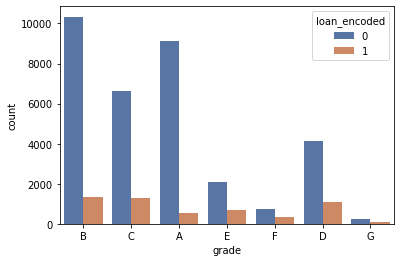

In [68]:
# plotting default rates across grade of the loan
sns.countplot(x='grade',hue='loan_encoded',palette='deep', data=df)
plt.show()

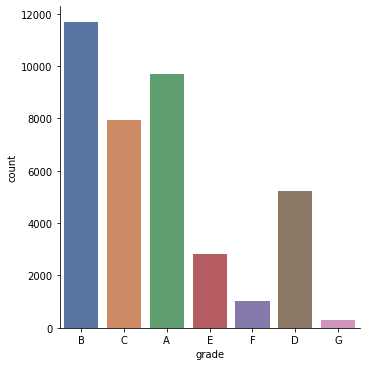

In [69]:
#Plotting the number of records per grade
sns.catplot(x="grade", kind="count", palette="deep", data=df);

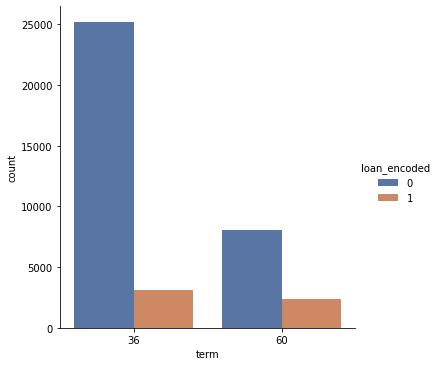

In [70]:
#Plotting the frequency of Fully paid and Charged Off loans for every loan term
sns.catplot(x="term", kind="count", palette="deep", data=df,hue='loan_encoded');

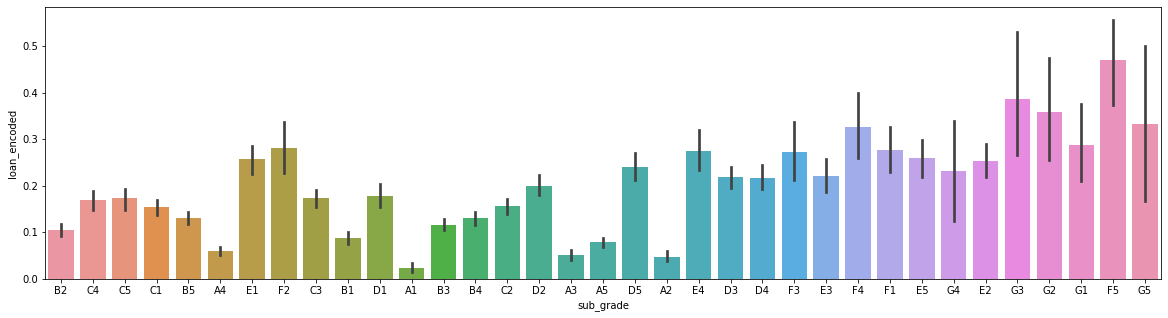

In [71]:
#Plotting the frequency per Sub Grade
plt.figure(figsize=(20, 5))
sns.barplot(x="sub_grade", y='loan_encoded', data=df);

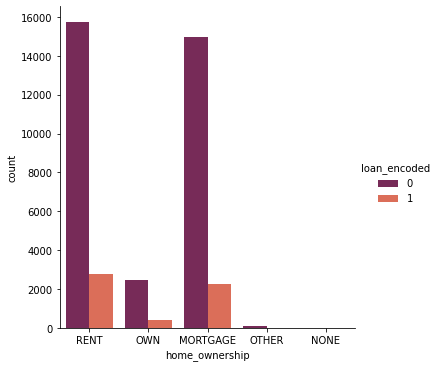

In [72]:
sns.catplot(x="home_ownership", kind="count", palette="rocket", data=df,hue='loan_encoded');

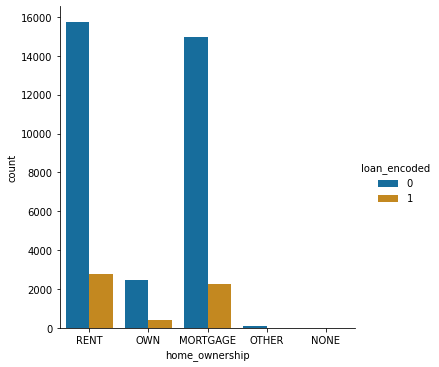

In [73]:
sns.catplot(x="home_ownership", kind="count", palette="colorblind", data=df, hue='loan_encoded');

<AxesSubplot:xlabel='purpose', ylabel='count'>

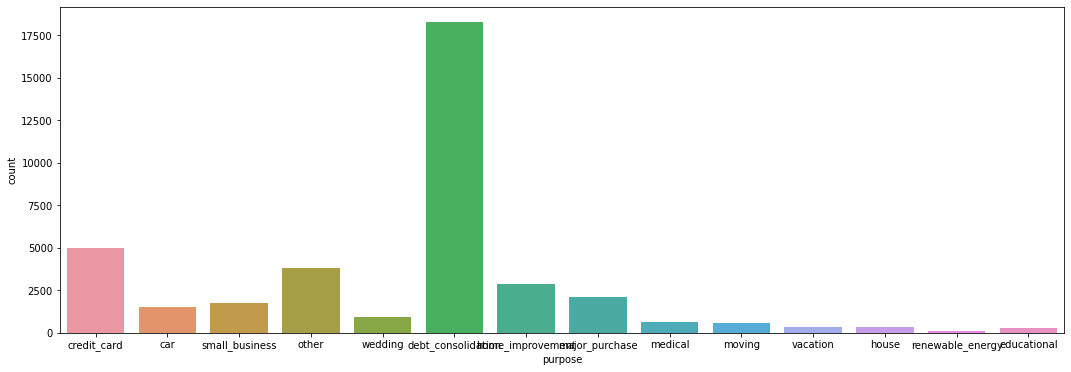

In [74]:
plt.figure(figsize=(18, 6))
sns.countplot(x="purpose", data=df)

<AxesSubplot:xlabel='issue_d', ylabel='loan_encoded'>

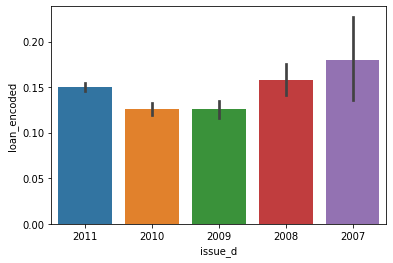

In [75]:
sns.barplot(x='issue_d', y='loan_encoded', data=df)

/home/shoebhabeeb/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

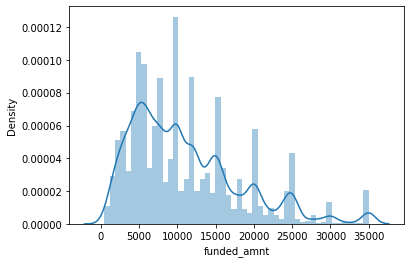

In [76]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['funded_amnt'])

<AxesSubplot:xlabel='int_rate_cat', ylabel='count'>

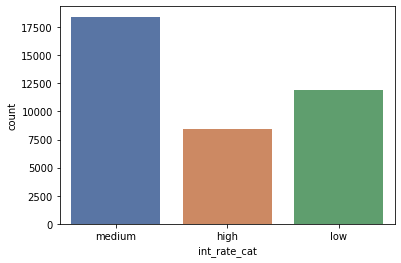

In [77]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate_cat'] = df['int_rate'].apply(lambda x: int_rate(x))
df['int_rate_cat'].value_counts()

sns.countplot(x="int_rate_cat", data=df,palette='deep')

<AxesSubplot:xlabel='home_ownership', ylabel='int_rate'>

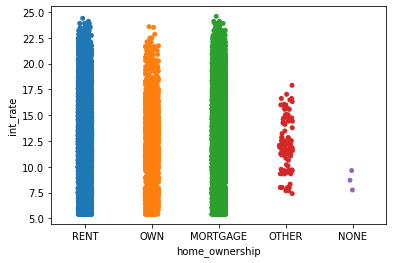

In [78]:
sns.stripplot(x=df['home_ownership'], y=df['int_rate'], data=df)

<AxesSubplot:>

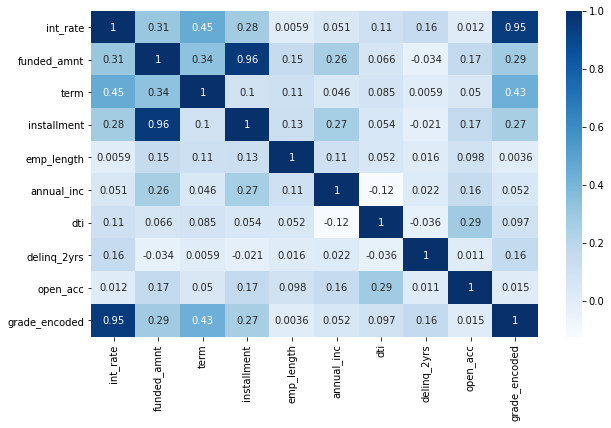

In [79]:
#correlation heatmap
plt.figure(figsize=(10, 6))
df_h=df[['int_rate','funded_amnt','term','installment','emp_length','annual_inc','dti','delinq_2yrs','open_acc','total_acc','grade_encoded','total_acc']]
sns.heatmap(df_h.corr(),annot=True,cmap='Blues')

/home/shoebhabeeb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


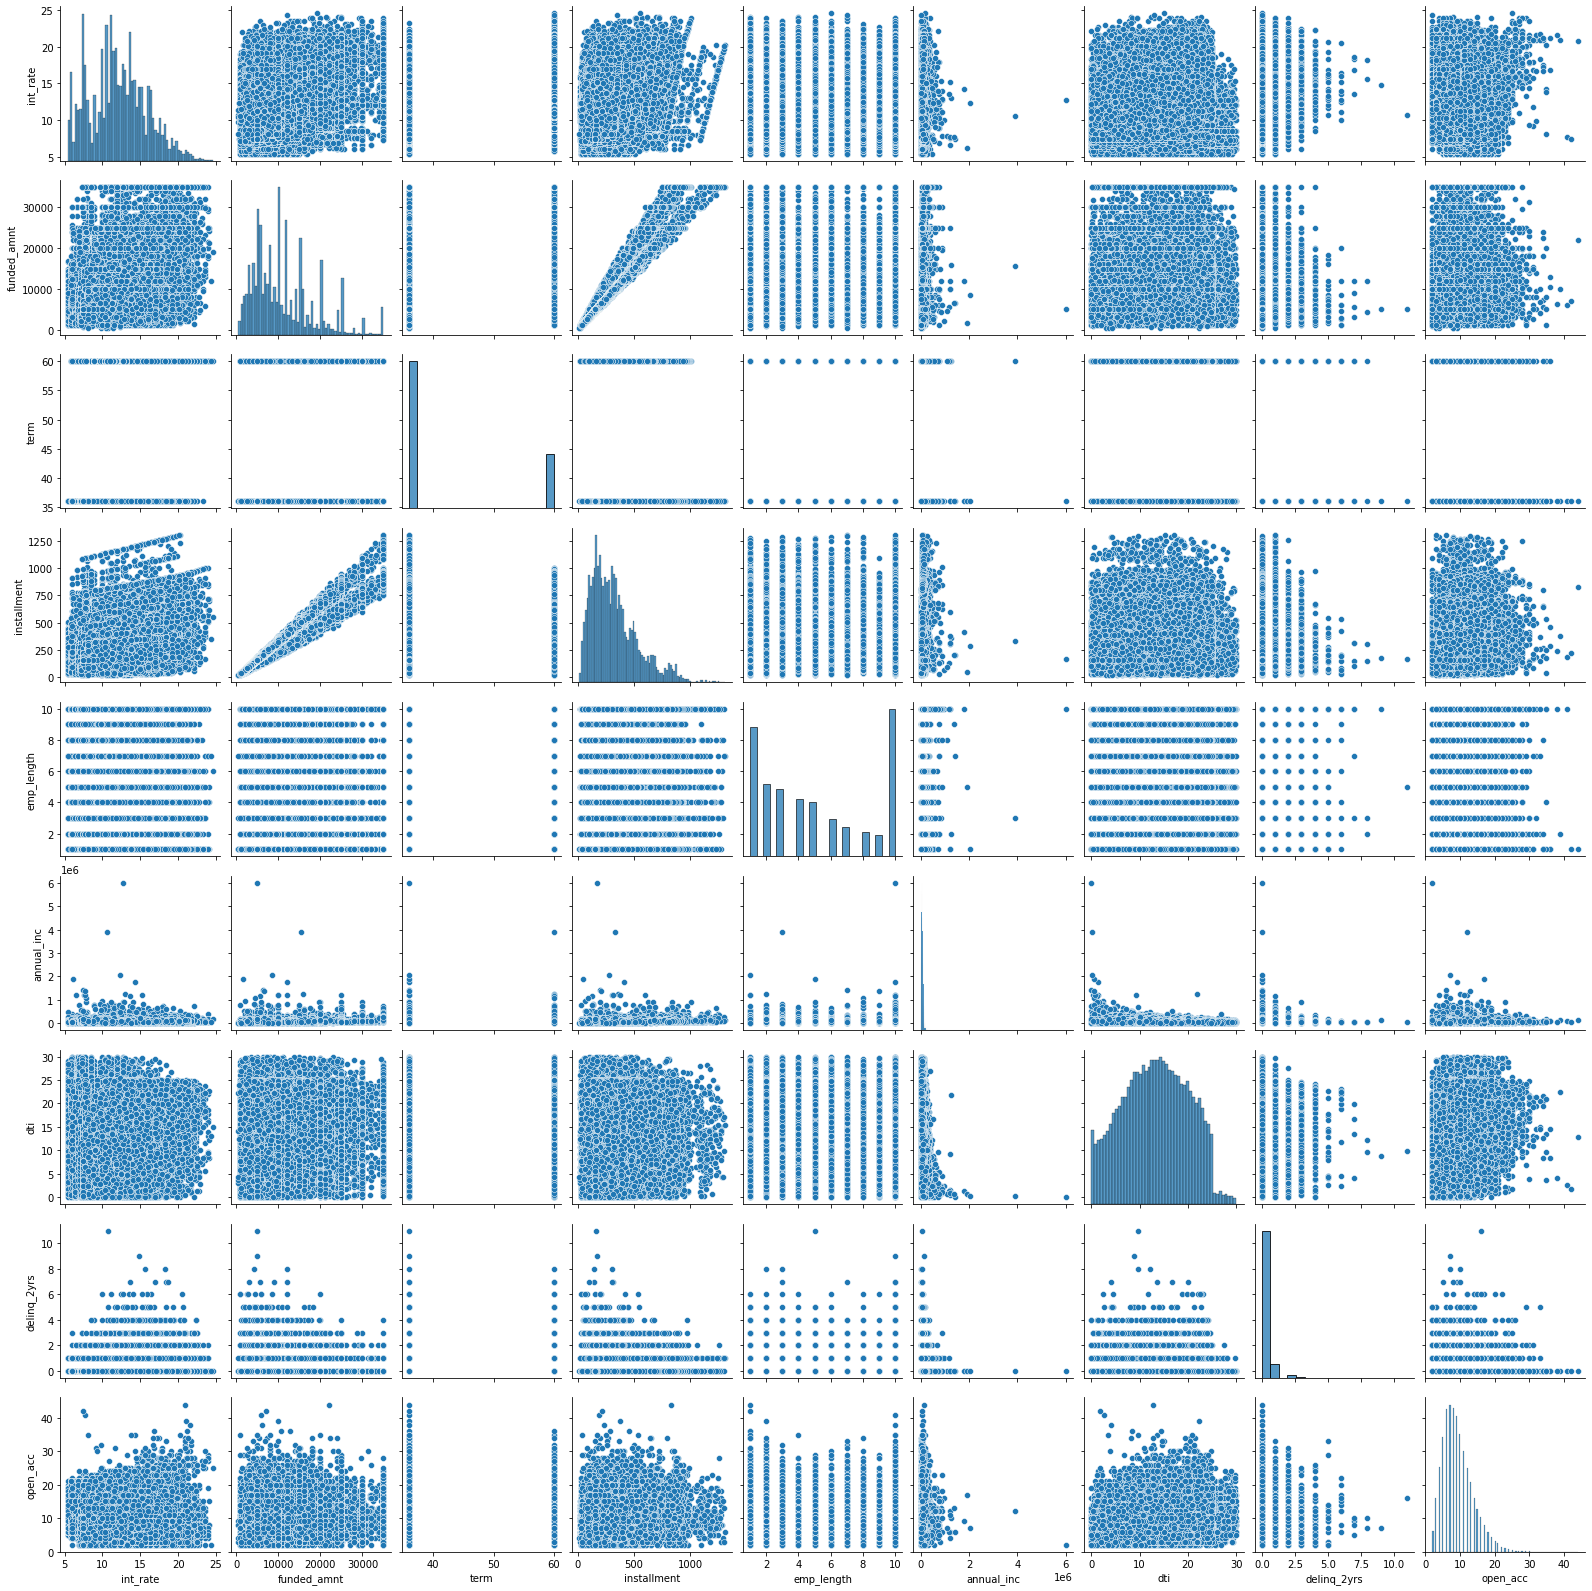

In [80]:
df_h['loan_status']=df['loan_encoded']
sns.pairplot(df_h.iloc[:,:9])

In [81]:
df['issue_d'] = df['issue_d'].str.split('-').str[1]

In [82]:
def expand(dataframe, column, pre):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[column], prefix=pre)],axis=1)
    dataframe = dataframe.drop(column, axis=1)
    return(dataframe)

In [83]:
#One hot encoding of categorical variables
df = expand(df,'home_ownership', 'HO')
df = expand(df,'verification_status', 'VS')
df = expand(df,'loan_status', 'LS')
df = expand(df,'purpose', 'P')
df = expand(df,'issue_d', 'Year')

In [84]:
df.shape

(38708, 42)

In [85]:
def grade(n):
    if n == 'A' or n == 'B':
        return 'low'
    elif n == 'C' or n == 'D':
        return 'medium'
    else:
        return 'high'
    
    
df['grade_class'] = df['grade'].apply(lambda x: grade(x))

<AxesSubplot:xlabel='grade_encoded', ylabel='count'>

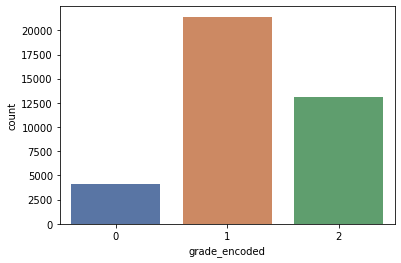

In [86]:
#Encoding the target variable
lb_make = LabelEncoder()
df['grade_encoded'] = lb_make.fit_transform(df['grade_class'])
sns.countplot(x="grade_encoded", data=df,palette='deep')

In [87]:
#Dropping columns which are not relevant for grade_class prediction
df = df.drop(['sub_grade', 'zip_code', 'grade','addr_state','int_rate','installment', 'grade_class', 'int_rate_cat'], axis=1)

In [88]:
#Changing column type
df['funded_amnt'] = df['funded_amnt'].astype(float)
df['annual_inc'] = df['annual_inc'].astype(float)
df['dti'] = df['dti'].astype(float)
df['delinq_2yrs'] = df['delinq_2yrs'].astype(float)
df['open_acc'] = df['open_acc'].astype(float)
df['total_acc'] = df['total_acc'].astype(float)

In [89]:
df.shape

(38708, 35)

In [91]:
#X,y split
X = df.loc[:, df.columns != 'grade_encoded']  # Features
y = df['grade_encoded']  # Labels

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [93]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Predicting using the created model
y_pred=clf.predict(X_test)

In [191]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6203392749504866
[[ 362  292  603]
 [  79 5366 1024]
 [ 243 2168 1476]]


In [192]:
y_test.value_counts()

1    6469
2    3887
0    1257
Name: grade_encoded, dtype: int64

In [193]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.33247222939808835


In [194]:
#Create a svm Classifier
clf = svm.SVC(gamma='scale') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6019977611297683


In [195]:
#Logistic Regression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/home/shoebhabeeb/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.6110393524498406


In [205]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5875312150176526


In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)#Create new KNN object
knn_2 = KNeighborsClassifier()#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)#Fit the model
best_model = clf.fit(X_train, y_train)#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

KeyboardInterrupt: 

In [198]:
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train, y_train)  
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
        learning_rate=1.0, n_estimators=1000, random_state=0)
clf.feature_importances_  

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6236114699044175


In [112]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.286580,0.333631,-0.542331,0.231904,-1.032553,-0.256150,0.784282,-0.579871,0.044118,0.122829,...,-0.002154,-0.007423,0.000427,-0.000094,4.008412e-14,1.781692e-16,-7.401952e-16,-1.471497e-15,1.235364e-15,-1.726825e-16
1,-0.540895,1.276774,1.038756,1.087957,0.256413,0.429355,-0.444990,0.071764,-0.055777,-0.286086,...,-0.005263,-0.017033,-0.001206,0.000787,1.703548e-14,2.984541e-15,-3.895629e-16,3.212148e-16,-4.783781e-16,-3.441025e-16
2,-0.809271,-0.532285,0.147498,0.031321,-0.378983,0.171966,0.586159,0.225478,-0.219414,-0.385200,...,-0.003830,-0.019166,-0.004431,0.002408,-1.633825e-15,4.773702e-16,2.291680e-16,3.054560e-15,-2.479356e-15,1.307129e-16
3,-0.569588,0.124092,-0.387666,0.938101,0.138395,-0.022021,0.722430,0.559639,-0.401347,0.586245,...,-0.004098,-0.023495,-0.004052,0.001907,1.765386e-15,2.487364e-16,-6.011564e-17,-1.715445e-16,1.540124e-16,2.835283e-16
4,-0.584344,0.395219,-0.386968,1.019264,0.128365,0.725058,-0.402162,0.414235,-0.270628,0.663835,...,-0.002104,-0.023858,0.003171,-0.002180,2.644964e-15,9.827913e-16,-5.223002e-16,-8.187043e-16,-9.759876e-16,3.413066e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38703,0.404190,-1.114615,0.339783,0.101559,-0.113114,-0.079392,-0.236307,0.152744,-0.078621,-0.571070,...,-0.001995,-0.025022,0.002888,-0.001620,3.399839e-17,-4.519905e-17,-5.088772e-19,2.260450e-17,-2.586797e-17,4.817221e-19
38704,-0.967389,-0.578923,0.100083,0.200752,-0.560327,0.047257,0.044135,-0.695777,0.089813,0.047900,...,-0.000820,0.084503,-0.006011,0.003182,1.289983e-16,2.089553e-17,-2.984068e-18,2.078588e-19,-3.833495e-18,-2.367413e-17
38705,0.220170,-0.805769,0.169229,-0.607674,0.487228,-0.227576,-0.563236,-0.079065,-0.049062,0.020507,...,0.001136,-0.012627,0.003554,-0.002252,-1.947082e-17,-5.966384e-18,3.916344e-18,8.264758e-18,-8.971610e-18,-2.936407e-17
38706,0.202559,-1.095878,0.360905,0.175251,-0.190084,-0.115373,-0.567417,0.462019,-0.300418,0.639005,...,0.000717,-0.012656,0.016156,-0.009579,2.272432e-16,1.981353e-17,-8.402649e-18,6.161944e-17,-3.344506e-17,-2.113539e-17


In [115]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.83077809e-01, 1.49769800e-01, 1.25312297e-01, 1.04240097e-01,
       9.48552701e-02, 5.93474966e-02, 4.57782922e-02, 4.23895782e-02,
       3.60137388e-02, 2.98624991e-02, 2.23921186e-02, 1.79449873e-02,
       1.73956707e-02, 1.50666021e-02, 1.14674383e-02, 9.56296435e-03,
       8.57825425e-03, 6.78407127e-03, 5.43391688e-03, 3.84057354e-03,
       3.29044412e-03, 2.99858220e-03, 1.68948767e-03, 1.20040017e-03,
       9.34488354e-04, 7.03828141e-04, 3.48447756e-05, 3.44498665e-05,
       3.61057316e-32, 1.62176994e-33, 1.10057110e-33, 1.10057110e-33,
       1.10057110e-33, 1.10057110e-33])

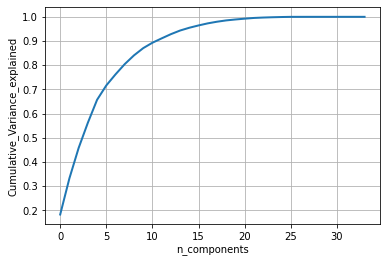

In [119]:
cum_var_explained=np.cumsum(explained_variance)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [122]:
pca=PCA()  
pca.n_components=34
pca_data=pca.fit_transform(X_train)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=18.290000
if n_components= 1,   variance=33.300000
if n_components= 2,   variance=45.870000
if n_components= 3,   variance=56.270000
if n_components= 4,   variance=65.790000
if n_components= 5,   variance=71.750000
if n_components= 6,   variance=76.320000
if n_components= 7,   variance=80.520000
if n_components= 8,   variance=84.110000
if n_components= 9,   variance=87.070000
if n_components= 10,   variance=89.300000
if n_components= 11,   variance=91.100000
if n_components= 12,   variance=92.850000
if n_components= 13,   variance=94.340000
if n_components= 14,   variance=95.490000
if n_components= 15,   variance=96.430000
if n_components= 16,   variance=97.300000
if n_components= 17,   variance=98.000000
if n_components= 18,   variance=98.550000
if n_components= 19,   variance=98.930000
if n_components= 20,   variance=99.260000
if n_components= 21,   variance=99.550000
if n_components= 22,   variance=99.720000
if n_components= 23,   variance=99.830000
if

In [123]:
pca=PCA(.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 12


shape of PCA data (27095, 2)


/home/shoebhabeeb/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


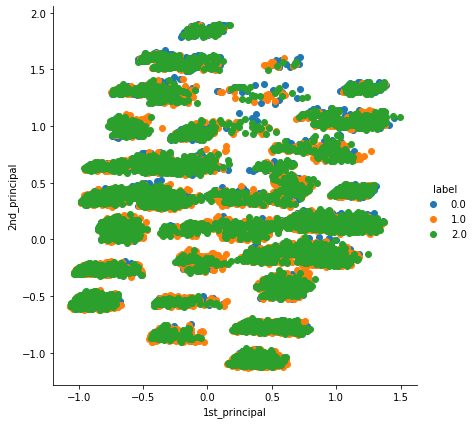

In [129]:
pca=PCA(n_components=2) 
pca_data_vis=pca.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis.shape)
pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [130]:
pca=PCA(.90) 
pca.fit(X_train) 
X_train=pca.transform(X_train) 
X_test=pca.transform(X_test)
from sklearn.linear_model  import LogisticRegression  
LogReg=LogisticRegression(class_weight='balanced')  
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

In [133]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
print('Accuracy:',accuracy_score(y_test,y_pred))  
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))   
print('Recall:',recall_score(y_test,y_pred,average='weighted'))   
print('Precision:',precision_score(y_test,y_pred,average='weighted'))  
print('\n clasification report:\n',classification_report(y_test,y_pred))  
print('\n confussion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.5433565831395849
F1 score: 0.5207478259987436
Recall: 0.5433565831395849
Precision: 0.553450694600901

 clasification report:
               precision    recall  f1-score   support

           0       0.29      0.73      0.42      1211
           1       0.68      0.73      0.71      6439
           2       0.42      0.18      0.25      3963

    accuracy                           0.54     11613
   macro avg       0.47      0.55      0.46     11613
weighted avg       0.55      0.54      0.52     11613


 confussion matrix:
 [[ 880  204  127]
 [ 887 4728  824]
 [1262 1999  702]]


In [ ]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(166,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)


In [ ]:
plt.figure(figsize=(14, 10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)